In [79]:
import geopandas as gpd
from pyproj import Proj, transform
# from shapely.geometry import Polygon, MultiPolygon, Point

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["figure.figsize"] = (10, 10)
# import seaborn as sns

# import folium 
import warnings
warnings.filterwarnings("ignore")

In [99]:
data = pd.read_csv("./data/전국주차장정보표준데이터.csv", encoding="cp949")
busan_data = data[data["관리기관명"].apply(lambda x : True if "부산" in x else False)]
geo_data = busan_data[["주차장명", "주차장구분", "소재지지번주소", "위도", "경도"]]

In [109]:
def wgs2utmk(df): 
    proj_UTMK = Proj(init="epsg:5178")
    proj_WGS84 = Proj(init="epsg:4326")
    
    return pd.Series(transform(proj_WGS84, proj_UTMK, df["x"], df["y"]))

In [110]:
geo_data[["위도", "경도"]].apply(wgs2utmk, axis=1)

KeyError: 'x'

In [108]:
geo_data = gpd.GeoDataFrame(geo_data, geometry=gpd.points_from_xy(geo_data["X좌표"], geo_data["Y좌표"]))

KeyError: 'X좌표'

출처 : http://www.gisdeveloper.co.kr/?p=2332

In [51]:
file_ = "./data/sig.shp"
busan_geo = gpd.read_file(file_, encoding = "cp949")
busan_list = ["중구", "연제구", "동구", "서구", "남구", "북구", "강서구", "사상구", "사하구", "부산진구", "동래구", "수영구", "해운대구", "기장군", "영도구", "금정구"]
busan_geo = busan_geo[busan_geo["SIG_CD"].apply(lambda x: True if x[:2] == "26" else False)]

In [52]:
geo_data.head()

,주차장명,주차장구분,소재지지번주소,위도,경도,geometry
378,동주마루 공영주차장,공영,부산광역시 사하구 괴정동 380-36,35.100132,129.002216,POINT (129.00222 35.10013)
398,괴정천복개로(하단동) 공영주차장,공영,부산광역시 사하구 하단동 870-6,35.102916,128.968125,POINT (128.96812 35.10292)
399,사하구청 앞 공영주차장,공영,부산광역시 사하구 당리동 317-100,35.103708,128.974997,POINT (128.97500 35.10371)
400,괴정3동 공영주차장,공영,부산광역시 사하구 장림동 328-4,35.082158,128.967134,POINT (128.96713 35.08216)
401,당리동 샛별공원 지하공영주차장,공영,부산광역시 사하구 장림동 328-4,35.082158,128.967134,POINT (128.96713 35.08216)


In [63]:
busan_geo.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
25,26110,Jung-gu,중구,"POLYGON ((1139632.900 1681213.674, 1139636.835..."
26,26140,Seo-gu,서구,"MULTIPOLYGON (((1138209.337 1673609.183, 11381..."
27,26170,Dong-gu,동구,"POLYGON ((1140524.122 1684496.506, 1140581.141..."
28,26200,Yeongdo-gu,영도구,"MULTIPOLYGON (((1145321.803 1672570.514, 11453..."
29,26230,Busanjin-gu,부산진구,"POLYGON ((1140191.580 1690472.921, 1140221.561..."


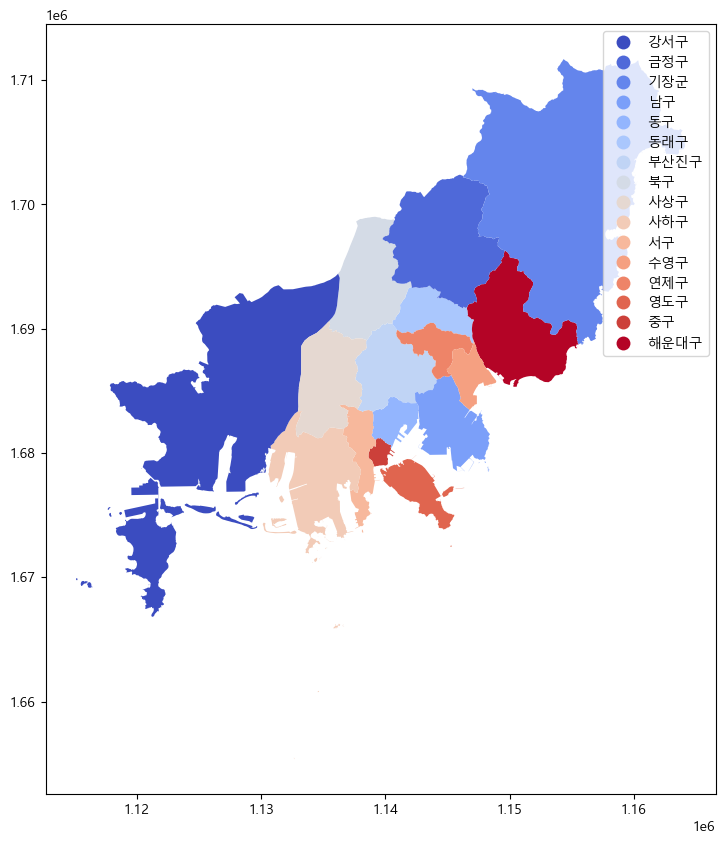

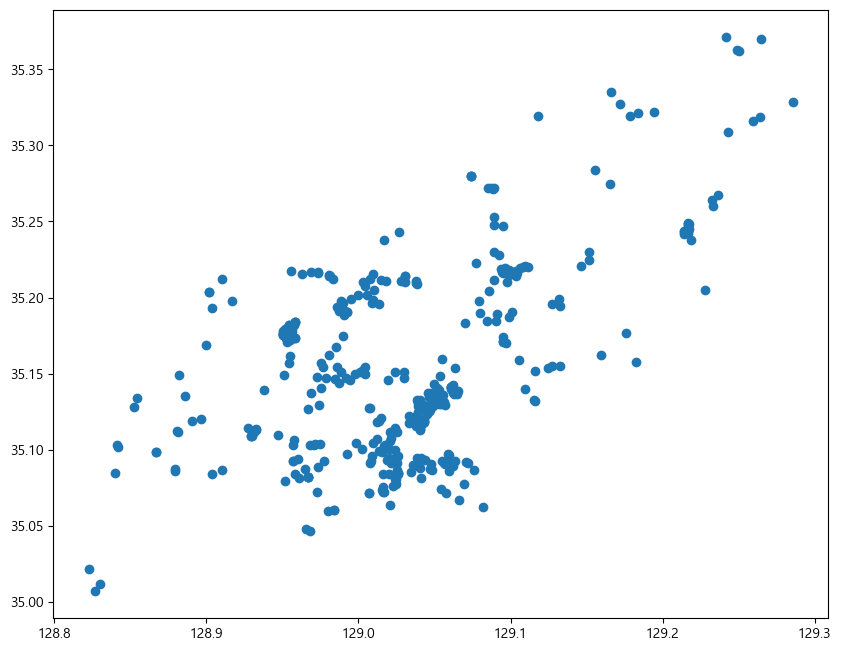

In [67]:
busan_geo.plot(
    figsize=(10, 10), 
    column='SIG_KOR_NM', 
    cmap="coolwarm",  ## tab20b 
    legend=True, 
    categorical=True
    )
geo_data.plot()
plt.show()

In [16]:

# geo_data.set_crs(epsg = 4326, inplace = True)

<Axes: >

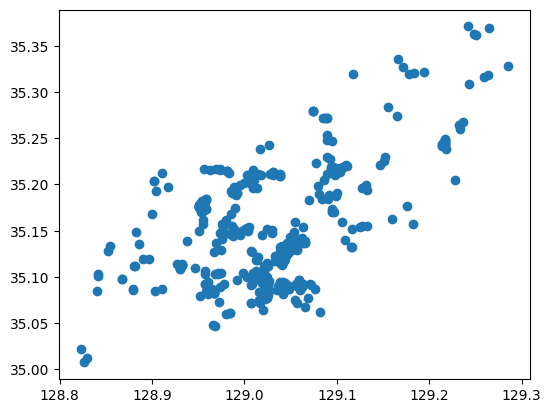

In [18]:
geo_data.plot()

In [19]:
map = folium.Map(location = [35.1856505,129.1], zoom_start=10)

In [22]:
map